# (AI Math 6, 7강) 확률, 통계학 맛보기

- 분산 및 불확실성을 최소화하기 위해서 확률론을 알아야함

1. **이산형 확률분포와 연속형 확률분포는 확률분포$D$에 따라 구분된다.**
2. 이산형 확률변수는 확률변수가 가질 수 있는 경우의 수를 모두 고려하여 확률을 더해서 모델링한다
3. 연속형 확률변수는 데이터 공간에 정의된 확률변수의 밀도(density)위에서의 적분을 통해 모델링한다


### 몬테카를로 샘플링
1. 확률분포를 알면, 기댓값을 계산하는데 이용할 수가 있다.
2. 하지만 대부분의 기계학습 문제는 확률분포를 명시적으로 모를 때가 많다.
3. 그렇기 때문에 데이터를 이용해서 기댓값을 이용해야 되는데, 이때 몬테카를로 샘플링 방법을 사용함.
4. 샘플링을 할 때, 독립추출만 보장된다면, 대수의 법칙에 의해 수렴성을 보장받음.
5. 타겟인 $f(x)$에 샘플링한 데이터를 대입하고, 데이터에 따라 $f(x^i)$값들에 대해 산술평균을 구함.


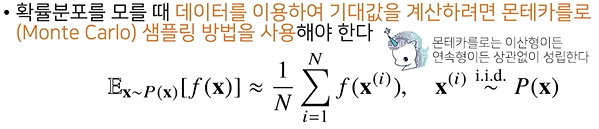


5. 비모수 방법론은 모수를 쓰지 않는다가 아니라, 모수가 무한히 많거나 데이터에 따라서 바뀌는 것을 말한다.

6. 분포마다 검정하는 방법들이 있고, 모수를 추정한 후에는 검정을 해야함.

## 최대가능도
1. 이론적으로 가장 가능성이 높은 모수를 추정하는 방법 중 하나가 **최대가능도 추정법(MLE)**이다
3. 주어진 데이터 x에 대해서 모수 $\theta$를 변수로 둔 함수다
4. 데이터가 주어진 상황에서 $\theta$를 변형시킴에 따라 값이 바뀌는 함수다.
5. 모수 $\theta$를 따르는 분포가 데이터 x를 관찰할 가능성을 뜻함.(확률로 생각하면 안됨, $\theta$에 대해 크고 작음에 따른 대소비교가 가능한 함수로 이해하자)
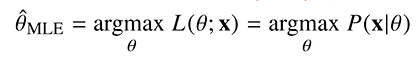

### <font color='blue'>최대가능도(최대우도법) 자료!!</font>
- https://angeloyeo.github.io/2020/07/17/MLE.html (이론)
- https://everyday-image-processing.tistory.com/30 (예시)

### 로그가능도
1. 로그함수는 곱을 덧셈으로 바꿔줌.
2. Likelihood에 로그를 곱해준다.
3. 원래 MLE와 똑같은 최적화이지만, 연산량을 $O(n^2)$에서 $O(n)$으로 줄여준다.
4. 손실함수의 경우 경사하강법을 사용하므로, 음의 로그가능도를 최적화한다.(목적식을 최소화하는 방향으로 최적화)

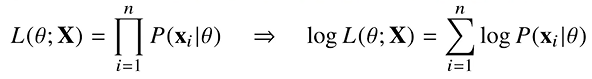

---

## 기계학습에서 사용하는 최대가능도
$\theta$ = $(W^1 ,...,W^L)$

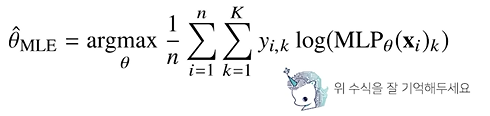

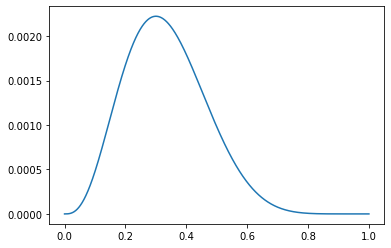

In [3]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.arange(0, 1, 0.001)
p = theta ** 3 * (1 - theta) ** 7
plt.plot(theta, p)
plt.show()

---

# (AI Math 8강) 베이즈 통계학 맛보기
- 베이즈 정리
    - 데이터가 새로 추가되었을 때 정보를 업데이트하는 방식에 대한 기반이다.
    - 사전확률, 사후확률, evidence ...


- 인과관계 추론

## 조건부 확률

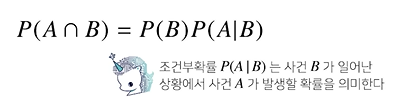

## 베이즈 정리
- 조건부 확률을 이용해서 정보를 갱신하는 방법이다.

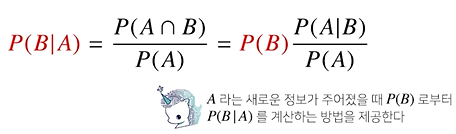

- $D$는 관찰하는 데이터
- $\theta$는 모델에서 계산하고 싶은 파라미터(모수)
- 사후확률은 데이터가 주어졌을 때(관찰했을 때), 이 파라미터, 가설이 성립할 확률
- 사전확률은 데이터가 주어지지 않은 상황에서, 사전에 주어진 확률
- 가능도는 현재 주어진 모수에서 데이터가 관찰된 확률
- Evidence는 데이터 전체의 분포
- 가능도와 evidence를 통해서 사전확률을 사후확률로 업데이트 한다.

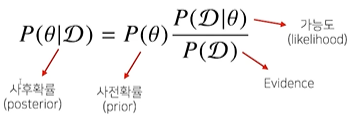

- Evidence는 가능도를 이용해서 계산할 수 있음. 
- $P(D) = P(D|\theta) \times P(\theta) + P(D|\neg\theta) \times P(\neg\theta)$

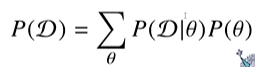

---

## 조건부 확률의 시각화
- Confusion Matrix
- TP: 실제로 양성이 나왔을 때, 검진도 양성
- TN: 실제로 음성이 나왔을 때, 검진도 음성
- FP: 검진이 양성인데, 실제는 음성 (1종 오류) (False Alarm과 관련)
- FN: 검진이 음성인데, 실제는 양성 (2종 오류)
- $P(\theta|D)$ 정밀도 = TP / (TP + FP)

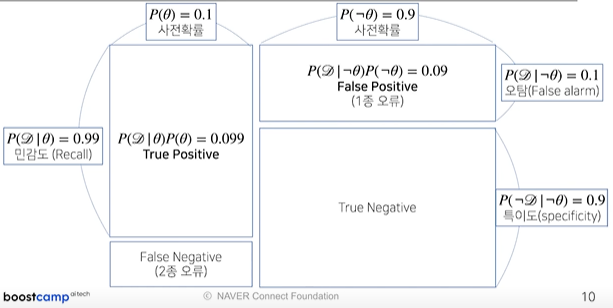

### 베이즈 정리를 통한 정보의 갱신
- 사후확률을 사전확률로 사용해서 갱신된 사후확률을 계산할 수 있다,
- Evidence도 바뀜 $P(D) \rightarrow P(D^*)$

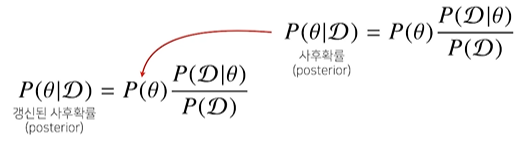

### 하지만 조건부 확률을 갖고 인과관계를 추론하면 안 된다!
- 인과관계는 데이터 분포의 변화에 강건한 예측모형을 만들 때 필요함
- 조건부 확률만 가지고 모형을 만들면 새로운 정책이나 데이터가 생기면 시나리오에 따라 예측확률이 크게 달라짐.
- 인과관계를 기반으로 해서 예측모형을 만들어야 데이터 분포에 강건한 모형이 만들어진다.
- 인과관계를 알아내기 위해서는 중첩요인(confounding factor)의 효과를 제거해야 함.